# Project: No-show apointment data analysis

Anaylsis by Eze Ahunanya 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This report aims to explore and uncover trends in the medical data in Brazil for 100K appointments to find out the characteristics of no-show appointments. No-show appointments are defined as scheduled appointments where the patient did not show up. In particular, the report aims to answer the following questions: 'What are the characteristics of gender and age in no show appointments?' and 'What is the effect of medical conditions on no-show appointments?'. The analysis will include the use of the packages pandas, numpy, matplotlib and seaborn.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

These are the relevant packages I will be using in this project.

<a id='wrangling'></a>
## Data Wrangling

### General Properties and structure

In [2]:
df = pd.read_csv('noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In the cell above the relevant data was read into pandas and the first 5 rows printed to see what the data looked and the different columns present.  The columns descriptions are as follows:
- 'PatientID' is a unique number for each patient
- 'AppointmentID' is a unque number for each appointment
- 'Gender' tells us the gender of each patient
- ‘ScheduledDay’ tells us on what day the patient set up their appointment
- ‘AppointmentDay’ tells us on what day the appointment is on
- 'Age' is how old the patient is
- ‘Neighborhood’ indicates the location of the hospital
- ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família
- 'Hipertension' shows if the patient has hypertension or not
- 'Diabetes' shows if the patient has diabetes
- 'Alcoholism' shows if the patient is connected to alcoholism
- 'Handcap' shows whether the person has a handicap present
- 'SMS-recieved' shows if one or more text messages were sent to the patient
- 'No-show' shows is the patient attended their appointment ('yes' means they did not show and 'no' means they did)

*'Hipertension', 'Diabetes', 'Alcoholism' and 'Handcap' are not made crystal clear in the original source for the data.

The 'Appointment ID', 'PatientID' 'ScheduledDay', 'AppointmentDay' and 'Neighbourhood' columns are not revelant to the questions to be answered and hence will be dropped later on.

There are a few spelling mistakes in the column titles such as 'Handcap' and 'Hipertension'. The columns names are also in title case which is not the conventional form. These issues will also be resolved later. 

In [3]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The describe method provides summary statistics for the data in data frame in question. The lowest value for the age is negative 1 which is definitely an error as it's impossible to have a negative age. This will be rectified when cleaning the data. Also the highest age is 115 which although is not impossible, is very unlikely. This will be filter to a more conservative max age of 100. In the 'Handcap' column the max value is 4 which is an error as this column should only have 1s and 0s for true and false.

The 'No-show' column is not included in the summary as that column is populated with strings of 'Yes' or 'No'. This can be changed into 1s and 0s for the patient not showing and the patient showing respectively. This will make it easier when finding the percentage of no-show appointments.

In [4]:
df.shape

(110527, 14)

The data frame has 110527 rows and 14 columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The info method gives information on the null values and the data type of the data present. There are no missing values as there are 110527 rows of which there are 110527 non-null values in each column. The data type of the entries in the 'No-show' column are objects which are strings. This explains why this column was not present in the data summary statistics above.


### Data Cleaning 

The issues discussed above will all be corrected in this section.

In [6]:
list = ['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood']
df.drop(columns=list, inplace=True)
df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,0,1,0,0,0,0,No
1,M,56,0,0,0,0,0,0,No
2,F,62,0,0,0,0,0,0,No
3,F,8,0,0,0,0,0,0,No
4,F,56,0,1,1,0,0,0,No


As discussed above, the irrelevant columns were dropped by creating a list and using the drop method on the data frame. This was done inplace so the changes were saved. The first 5 rows of the new data frame is presented.

In [7]:
df.rename(columns={'Hipertension':'hypertension', 'Handcap':'handicap', 'No-show':'no_show'}, inplace=True)
df.columns = map(str.lower, df.columns)
df.head()

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,62,0,1,0,0,0,0,No
1,M,56,0,0,0,0,0,0,No
2,F,62,0,0,0,0,0,0,No
3,F,8,0,0,0,0,0,0,No
4,F,56,0,1,1,0,0,0,No


The remaining column names where corrected of spelling mistakes and made all lower case to follow the conventional formatting. These changes are also inplace and previewed. 

In [8]:
df = df.query('0 <= age <= 100')

In [9]:
df.age.min(), df.age.max()

(0, 100)

Using the query method, the rows were filtered so only the ones where the age satisfies the condition of being a positive number below or equal to 100 were kept. This is a more realistic range compared to the extremites of -1 and 115 seen earlier. These changes were checked using the min and max methods and returned valid ages. The new filtered data frame 'df' was assigned  to the same name effectivily replacing the old one.

In [10]:
df = df.query('handicap <= 1')

In [11]:
df.handicap.value_counts()

0    108282
1      2038
Name: handicap, dtype: int64

With a similar code, the handicap rows with a value greater than 1 were filtered out. These values do not translate to either true or false and there is no way to know what the values were meant to be. Using the method value_counts the changes have taken effect correctly.

In [12]:
df['no_show'].replace('No', 0, inplace=True)
df['no_show'].replace('Yes', 1, inplace=True)

In [13]:
df.no_show.value_counts()

0    88045
1    22275
Name: no_show, dtype: int64

With the replace method the 'No' entries were repplaced with a value of 0 and the 'Yes' entries with a value of 1 in the 'no-show' column. This will make it easier to calculation the percentage of no show appointments. These changes were also verified with the value_counts method.

In [14]:
df.head()

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,62,0,1,0,0,0,0,0
1,M,56,0,0,0,0,0,0,0
2,F,62,0,0,0,0,0,0,0
3,F,8,0,0,0,0,0,0,0
4,F,56,0,1,1,0,0,0,0


In [15]:
df.shape

(110320, 9)

This is the first five rows of the cleaned table and there are now 9 columns and 110320 rows.

<a id='eda'></a>
## Exploratory Data Analysis

### What are the characteristics of gender and age in no-show appointments?

In [16]:
noshow = df.no_show == True
show = df.no_show == False

This cell contains the conditions of the mask variables to store the target variable.

In [17]:
noshow_p = df.gender[noshow].value_counts()/(df.gender[noshow].shape[0])
show_p = df.gender[show].value_counts()/(df.gender[show].shape[0])

print(noshow_p, show_p)

F    0.653872
M    0.346128
Name: gender, dtype: float64 F    0.649191
M    0.350809
Name: gender, dtype: float64


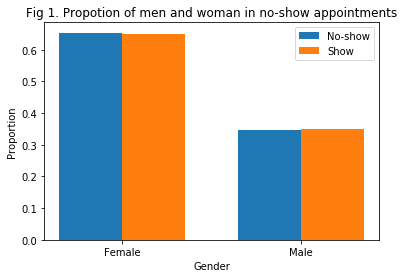

In [18]:
N = 2

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, noshow_p, width, label='No-show')
plt.bar(ind + width, show_p, width, label='Show')

plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.title('Fig 1. Propotion of men and woman in no-show appointments')

plt.xticks(ind + width / 2, ('Female', 'Male'))
plt.legend(loc='best')
plt.show()

Using the mask variables, the proportion of male and females who did not show up to their appointments  where calculated and also the ones who did. This was done by divinding the value counts by the total number of people producing two panda series with two values each.

These were then visulised on a bar chart using matplotlib. There is not a clear apparent correlation between gender and the frequency of no show appointments. This is because the propotions of male to female stay roughly the same of 35% to 65% for both no-show appointments and show appointments.

In [19]:
df.groupby('gender')['no_show'].mean()

gender
F    0.203073
M    0.199756
Name: no_show, dtype: float64

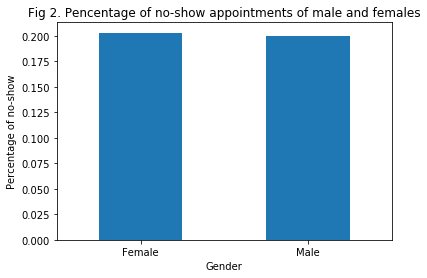

In [20]:
df.groupby('gender')['no_show'].mean().plot(kind='bar', rot=0)
plt.xlabel('Gender')
plt.xticks([0,1], ('Female', 'Male'), )
plt.ylabel('Percentage of no-show')
plt.title('Fig 2. Pencentage of no-show appointments of male and females');

By calculating the percentage of no-show appointments for each gender and plotting on a bar chart, these two cells above also confirmed that there isn't much of a correlation between gender and no-show appointments. The percentage of occurrence for no-show appointments is arround 20% for both sexes.

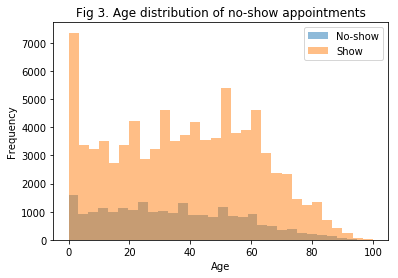

In [21]:
noshow_a = df.age[noshow]
show_a = df.age[show]

plt.hist(noshow_a, bins=30, alpha=.5, label='No-show')
plt.hist(show_a, bins=30, alpha=.5, label='Show')

plt.ylabel('Frequency')
plt.xlabel('Age')
plt.title('Fig 3. Age distribution of no-show appointments')

plt.legend(loc='best');

Using the mask variables, age histograms were plotted for the no-show and show patients and laied on top of each other. Between the ages 50-60 patients are more likely to attend appointments due to the increase in spikes in the 'show' histgram compared to the corresponding area in the 'no show' histogram. Both histograms are skewed to the right but the bulk of the 'no show' data seems to be slightly shifted to the left side compared to the 'show' appointments data. This suggests there a weak correlation at best between age and no show appointments where younger patients are less likely to attend appointments.

In [22]:
noshow_a.mean(), show_a.mean()

(34.268237934904604, 37.77387699471861)

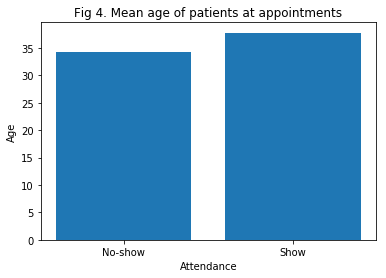

In [23]:
N = 2

ind = np.arange(N) 
plt.bar(ind, [noshow_a.mean(), show_a.mean()])

plt.xlabel('Attendance')
plt.ylabel('Age')
plt.title('Fig 4. Mean age of patients at appointments')

plt.xticks(ind, ('No-show', 'Show'))
plt.show()

The two cells above calculate the mean ages for patients in no-show and show appointments and plot the values on a bar chart. As hinted by the histogram the mean age for no show appointments is slightly lower by roughly 3 years. This confirms the weak correlation between the age and no show appointment. Younger patients are more likely to not attend appointments.

In [24]:
a1 = df.query('age < 10')
a2 = df.query('10 <= age < 20')
a3 = df.query('20 <= age < 30')
a4 = df.query('30 <= age < 40')
a5 = df.query('40 <= age < 50')
a6 = df.query('50 <= age < 60')
a7 = df.query('60 <= age < 70')
a8 = df.query('70 <= age < 80')
a9 = df.query('80 <= age < 90')
a10 = df.query('age >= 90')

In [25]:
age_groups = [a1, a2, a3, a4, a5, a6, a7, a8, a9, a10]

In [26]:
means = []

for group in age_groups:
    x = group.no_show.mean()
    means.append(x)

means

[0.19938158497480532,
 0.2521516631774831,
 0.24682156948706707,
 0.2175864800633747,
 0.20283318063288464,
 0.17478853680090897,
 0.1506156181480857,
 0.15207840486650895,
 0.15556318681318682,
 0.19950738916256158]

To get a more of an understanding of the relationship between age and no-show appointments, the data is split up accornding to age groups with a range of 10 years with the query function. These new data frames were assigned to variables a1 to a10.

With a loop function, the percentage pf no-show appointments was calulated for each age group and each iteration added into a list.

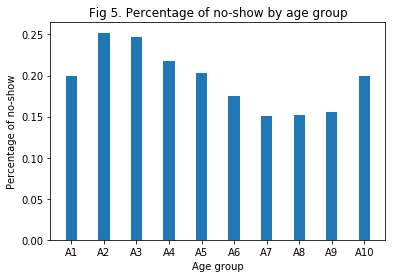

In [27]:
N = 10

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, means, width)

plt.xlabel('Age group')
plt.ylabel('Percentage of no-show')
plt.title('Fig 5. Percentage of no-show by age group')

plt.xticks(ind, (['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10']))

plt.show()

This list of no-show percentages were plotted into Fig 5 to give a better representation of the relationship between age and no-show appearance. It is a lot more apparent there is a negative correlation as the percentage of no-show appointments decreases with and increase with age group. This relationship is strong especially when the extreme groups A1 ('age < 10') and A10 ('age >= 90') are ignored. 

In [28]:
f_means = []
m_means = []

for group in age_groups:
    x = group.groupby('gender').no_show.mean()
    f_means.append(x[0])
    m_means.append(x[1])
    
f_means, m_means

([0.19876975033168495,
  0.24967808395570434,
  0.2493578344200751,
  0.21594715295869,
  0.20702724851464863,
  0.17490036147928445,
  0.15683596175338382,
  0.15396341463414634,
  0.1500253421186011,
  0.21201413427561838],
 [0.19993459064646243,
  0.2558955369323719,
  0.23961840628507294,
  0.2215909090909091,
  0.19358482042014907,
  0.17454977241242825,
  0.13745072273324574,
  0.14833501513622604,
  0.16719914802981894,
  0.17073170731707318])

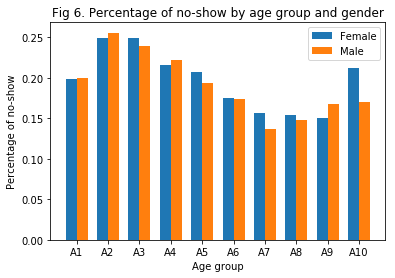

In [29]:
N = 10

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, f_means, width, label='Female')
plt.bar(ind + width, m_means, width, label='Male')

plt.xlabel('Age group')
plt.ylabel('Percentage of no-show')
plt.title('Fig 6. Percentage of no-show by age group and gender')

plt.xticks(ind + width / 2, (['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10']))
plt.legend(loc='best')
plt.show()

Using a similar loop as above, two lists were created for the perecentage of no-show appointments for each gender to plot in a bar chart. In the groupby output within the loop the first value is the female mean and the second the male mean.

Contrary to Fig 1 & Fig 2 gender does seem to play a role on the occurence of no-show appointments. On average females are more likely to not show to the appointments as there are more taller blue bars however this seems like a weak correlation. This difference is percentages is most apparent for the above 90 group (A10).

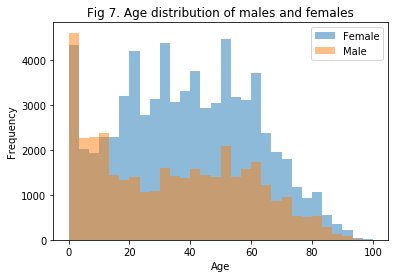

In [30]:
f_age = df[df.gender=='F'].age
m_age = df[df.gender=='M'].age

plt.hist(f_age, bins=30, alpha=.5, label='Female')
plt.hist(m_age, bins=30, alpha=.5, label='Male')

plt.ylabel('Frequency')
plt.xlabel('Age')
plt.title('Fig 7. Age distribution of males and females')

plt.legend(loc='best');

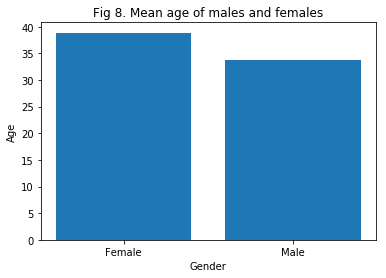

In [31]:
N = 2

ind = np.arange(N) 
plt.bar(ind, [f_age.mean(), m_age.mean()])

plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Fig 8. Mean age of males and females')

plt.xticks(ind, ('Female', 'Male'))
plt.show()

In [32]:
f_age.mean(), m_age.mean()

(38.874029251425625, 33.70635023447418)

Splitting the data frame into two with males and females two overlapping histograms were plotted with the age distributions. Both distributions are skewed to the right but the histogram for the males is skewed a lot more. 

Plotting the mean age for each gender in the bar chart, this is further supported as the males have a much lower mean of 33.7 compared to 38.9 for the females. This could explain why in Fig 2 there is no apparent relationship between gender and no-show appointments. As no-show appointments decrease with an increase of age and females are more likely to not attend appointments. So the combination of older females and younger males most likely negated the individual trends of each variable.

### What is the effect of medical conditions on no-show appointments?

In [33]:
c = df[noshow].mean()[2:6]
d = df[show].mean()[2:6]

c, d

(hypertension    0.168260
 diabetes        0.063838
 alcoholism      0.030303
 handicap        0.016296
 dtype: float64, hypertension    0.204066
 diabetes        0.073576
 alcoholism      0.030405
 handicap        0.019024
 dtype: float64)

Using the masks, this cell calculates the proportion of patients with medical conditions such as hypertension. 'c' is the group of patients who didn't show and 'd' is the group who did.

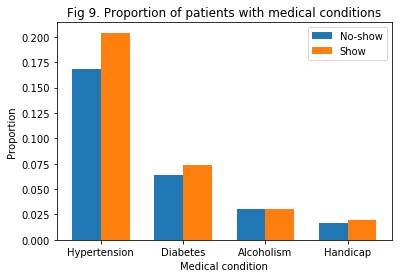

In [34]:
N = 4

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, c, width, label='No-show')
plt.bar(ind + width, d, width, label='Show')

plt.xlabel('Medical condition')
plt.ylabel('Proportion')
plt.title('Fig 9. Proportion of patients with medical conditions')

plt.xticks(ind + width / 2, (i.title() for i in c.index))
plt.legend(loc='best')
plt.show()

The bar chart represents the proportions of no-show and show patients with the medical conditions of hypertension, diabetes, alcoholism and a handicap. With the exclusion of alcholism patients who did not attend their appointments had a lower proportion of medical conditions present. This seems like a plausible correlation as patients with medical conditions would want to attend to their appointments to maintain their health. This relationship is the strongest for hypertension followed by diabetes and a handicap.

In [35]:
present = []
not_present = []

for name in c.index:
    x = df[df[name] ==1].age.mean()
    y = df[df[name] ==0].age.mean()
    present.append(x)
    not_present.append(y)
    
present, not_present

([60.56882339396731, 61.336455696202535, 49.55638424821002, 50.72914622178607],
 [31.30606624908301, 35.193985549697324, 36.67464101413507, 36.80888790380673])

This cell calculates the mean ages for the patients with and without the medical conditions anaylysed above. This is done using a loop with the index of the series created above. The list 'present' contains the mean ages for patients with the conditions and the list 'not_present' contains the mean ages of the patients without the medical conditions.

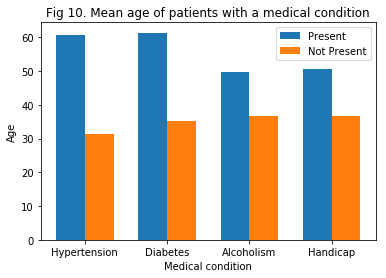

In [36]:
N = 4

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, present, width, label='Present') 
plt.bar(ind + width, not_present, width, label='Not Present')

plt.xlabel('Medical condition')
plt.ylabel('Age')
plt.title('Fig 10. Mean age of patients with a medical condition')

plt.xticks(ind + width / 2, (i.title() for i in c.index))
plt.legend(loc='best')
plt.show()

This cell is the visual representation of lists created above. The mean ages are significantly higher in the patients with a medical condition perhaps because younger people are generally healthier. This difference is even more apparent for hypertension and diabetes, both of which have the strongest correlation to no-show appointments. As seen above, the presence of a medical condition decreases no-show appointments but this could also be very intricately related to age; as with an increase in age no-show appointments also decrease and medical conditions are present in older patients on average.

<a id='conclusions'></a>
## Conclusions

In this report, age is found to have a fairly strong negative correlation with the percentage of no-show appointments seen in Fig 5. As age increases the no-show appointments decrease. Gender seems to a play a slight role on no-show appointments as females are shown to not attend their appointments as frequently as males seen in Fig 6. Finally the presence of a medical condition is shown to decrease no-show appointments seen in Fig 9. This is suspected to be closely related to age as the average age of a patient with a condition is much higher than one without seen in Fig 10. The correlation between the presence of a condition and no-show appointments is strongest with hypertension followed by diabetes then a handicap. There was not relationship observed with alcoholism. 

This report has its limitation for various reasons such as all the data from patients above 100 was ignored and no statistical tests were done to measure the strength of the correlations.